In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('123456.csv')
df.head()

,timestamp,weather_code,t1,is_weekend,is_holiday,cnt
0,2023/2/1 0:00,1,10,1,0,3
1,2023/2/1 0:10,1,10,1,0,5
2,2023/2/1 0:20,1,10,1,0,7
3,2023/2/1 0:30,1,10,1,0,3
4,2023/2/1 0:40,1,10,1,0,2


In [7]:
to_int = ['weather_code', 'is_holiday', 'is_weekend']
for col in to_int:
    df[col] = df[col].astype(int)

df['timestamp'] = pd.to_datetime(df['timestamp'])

#creating new columns fot the year, month, day, and day of the week
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day_of_week'] += 1 #changing the index to map monday as 1 instead of 0
df['hour'] = df['timestamp'].dt.hour

In [8]:
ordered_cols =['year', 'month', 'day', 'day_of_week', 'is_weekend', 'is_holiday', 'hour', 'cnt', 't1', 'weather_code']
df = df[ordered_cols]
df.head()

,year,month,day,day_of_week,is_weekend,is_holiday,hour,cnt,t1,weather_code
0,2023,2,1,3,1,0,0,3,10,1
1,2023,2,1,3,1,0,0,5,10,1
2,2023,2,1,3,1,0,0,7,10,1
3,2023,2,1,3,1,0,0,3,10,1
4,2023,2,1,3,1,0,0,2,10,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae

In [11]:
weather_map = {1:'good',0:'rainy'}
weather_map2 = { 'good': 1, 'rainy': -1}
df['weather'] = df['weather_code'].map(weather_map)
df['weather'] = df['weather'].map(weather_map2)

to_drop = [ 'year', 'month', 'day', 'weather_code']
df.drop(to_drop, axis=1, inplace=True)
df.head()

,day_of_week,is_weekend,is_holiday,hour,cnt,t1,weather
0,3,1,0,0,3,10,1
1,3,1,0,0,5,10,1
2,3,1,0,0,7,10,1
3,3,1,0,0,3,10,1
4,3,1,0,0,2,10,1


In [12]:
y = df['cnt']
X = df.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae_score = mae(y_test, y_pred)

print(f'the mean absolute error for the decision tree is {round(mae_score, 2)}')
print(f'while the mean rentals number is: {round(y_test.mean(), 2)}')

the mean absolute error for the decision tree is 30.82
while the mean rentals number is: 81.23


In [14]:
graph = X_test.copy()
graph['truth'] = y_test.iloc[:]
graph['pred'] = y_pred
graph['perc_err'] = np.abs((graph['truth'] - graph['pred']) / graph['truth'])

number of predictions with an error under 25.0%: 1143
number of predictions with a larger error: 1414


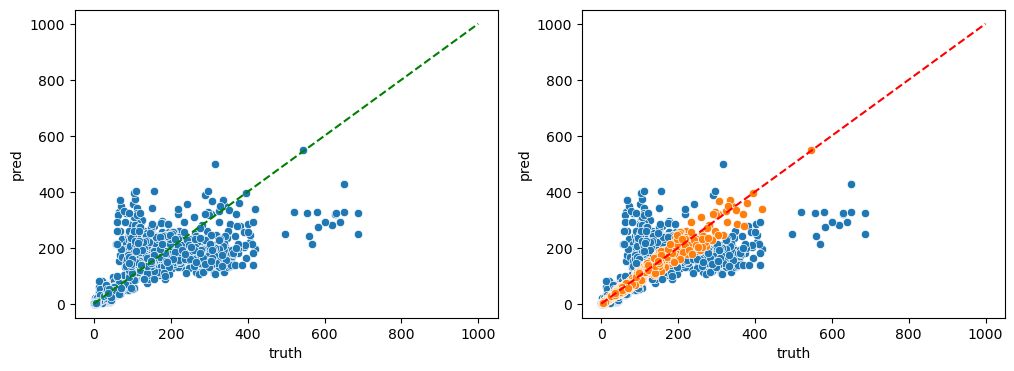

In [16]:
line=[0,1000]
threshold = 0.25
outliers = graph[graph['perc_err'] >= threshold]
inliers = graph[graph['perc_err'] < threshold]
print(f'number of predictions with an error under {threshold * 100}%: {inliers.shape[0]}')
print(f'number of predictions with a larger error: {outliers.shape[0]}')

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=graph, x='truth', y='pred')
sns.lineplot(ax=ax[0], x=line, y=line, color='green', linestyle='--')

sns.scatterplot(ax=ax[1], data=outliers, x='truth', y='pred')
sns.scatterplot(ax=ax[1], data=inliers, x='truth', y='pred')
sns.lineplot(ax=ax[1], x=line, y=line, color='red', linestyle='--')

plt.show()

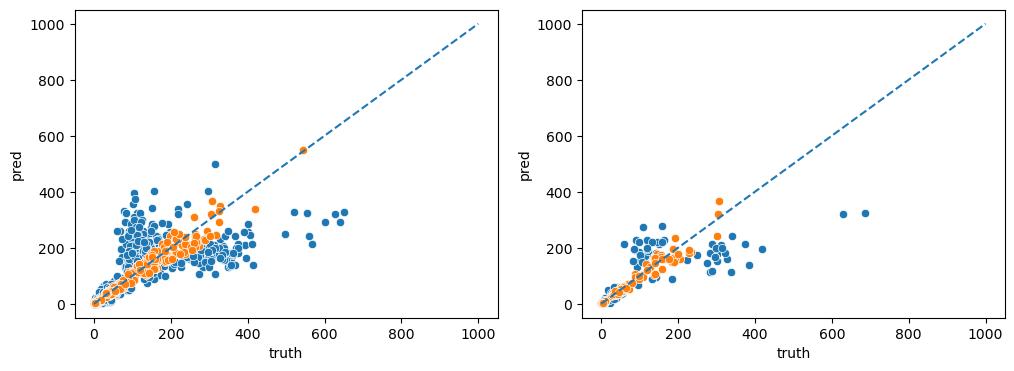

In [17]:
outliers_50 =  outliers.sample(frac=0.5)
inliers_50 = inliers.sample(frac=0.5)

outliers_10 = outliers.sample(frac=0.1)
inliers_10 = inliers.sample(frac=0.1)

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=outliers_50, x='truth', y='pred')
sns.scatterplot(ax=ax[0], data=inliers_50, x='truth', y='pred')
sns.lineplot(ax=ax[0], x=line, y=line, linestyle='--')

sns.scatterplot(ax=ax[1], data=outliers_10, x='truth', y='pred')
sns.scatterplot(ax=ax[1], data=inliers_10, x='truth', y='pred')
sns.lineplot(ax=ax[1], x=line, y=line, linestyle='--')

plt.show()

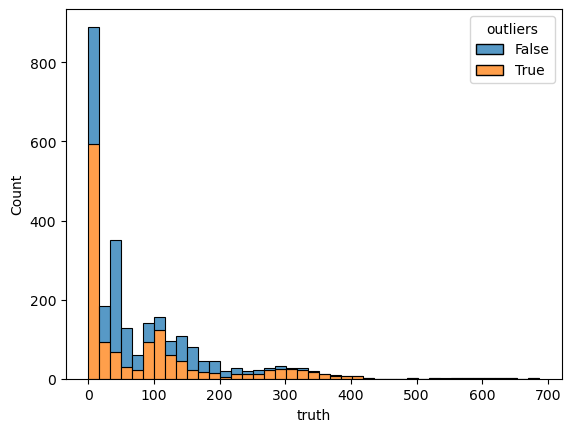

In [18]:
graph['outliers'] = graph['perc_err'] > threshold
sns.histplot(data=graph, x='truth', hue='outliers', multiple='stack')
plt.show()